# Exploratory Data Analysis

In [1]:
import pandas as pd
data = pd.read_csv('crop_production.csv')

In [2]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


# Summary Statistics

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [4]:
data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [5]:
data.describe(include='object')

,State_Name,District_Name,Season,Crop
count,246091,246091,246091,246091
unique,33,646,6,124
top,Uttar Pradesh,BIJAPUR,Kharif,Rice
freq,33306,945,95951,15104


# Missing Values Analysis

In [6]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [7]:
data[data.isnull().any(axis=1)].index.tolist()

[46,
 51,
 623,
 630,
 698,
 723,
 1153,
 1317,
 1419,
 1423,
 1424,
 1536,
 1610,
 2043,
 2210,
 2212,
 2219,
 2315,
 2350,
 2352,
 2489,
 2501,
 2661,
 2780,
 3180,
 3285,
 3446,
 3499,
 3560,
 3667,
 4009,
 4047,
 4279,
 4398,
 4448,
 4673,
 4729,
 4731,
 4971,
 5457,
 5648,
 5800,
 5943,
 5980,
 6050,
 6266,
 6354,
 6543,
 6566,
 6707,
 7044,
 7116,
 7245,
 7394,
 7395,
 7901,
 7971,
 8138,
 8625,
 8756,
 9008,
 9083,
 9196,
 9215,
 9275,
 9452,
 9586,
 9628,
 9793,
 11285,
 16241,
 19096,
 19614,
 20557,
 26120,
 26147,
 28181,
 30143,
 31017,
 31799,
 32109,
 32681,
 33085,
 35648,
 42685,
 43039,
 44385,
 45912,
 46054,
 46071,
 46101,
 46121,
 46202,
 46270,
 46745,
 46763,
 46812,
 46887,
 46927,
 46962,
 46999,
 47125,
 47148,
 47149,
 47150,
 47151,
 47152,
 47153,
 47154,
 47155,
 47156,
 47157,
 47158,
 47159,
 47161,
 47162,
 47163,
 47164,
 47165,
 47166,
 47167,
 47168,
 47169,
 47170,
 47171,
 47172,
 47173,
 47174,
 47175,
 47176,
 47207,
 47220,
 47233,
 47250,
 4725

# Distribution Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

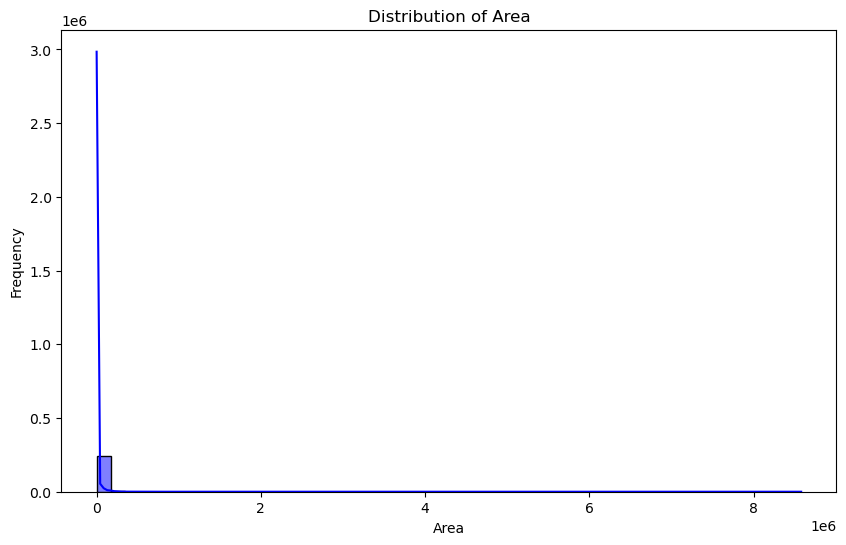

In [9]:
# Distribution plot for Area
plt.figure(figsize=(10, 6))
sns.histplot(data['Area'], bins=50, kde=True, color='blue')
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

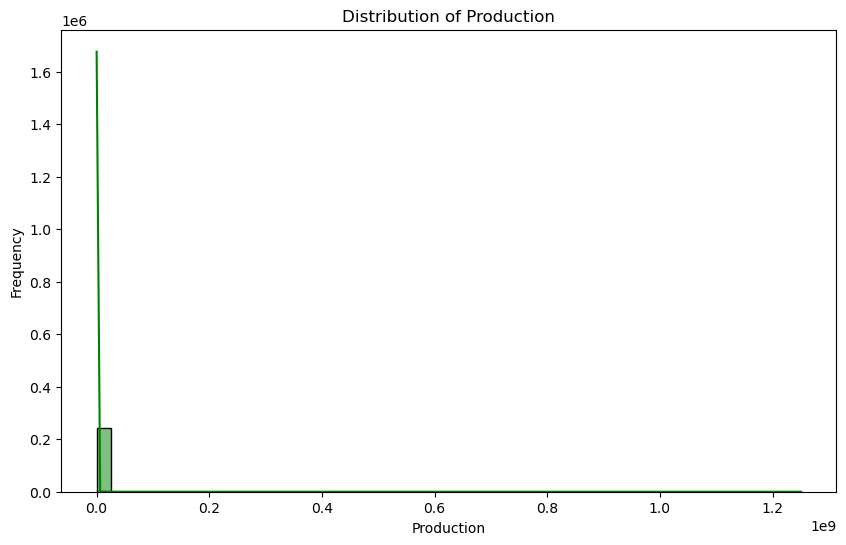

In [10]:
# Distribution plot for Production 
plt.figure(figsize=(10, 6))
sns.histplot(data['Production'].dropna(), bins=50, kde=True, color='green')
plt.title('Distribution of Production')
plt.xlabel('Production')
plt.ylabel('Frequency')
plt.show()

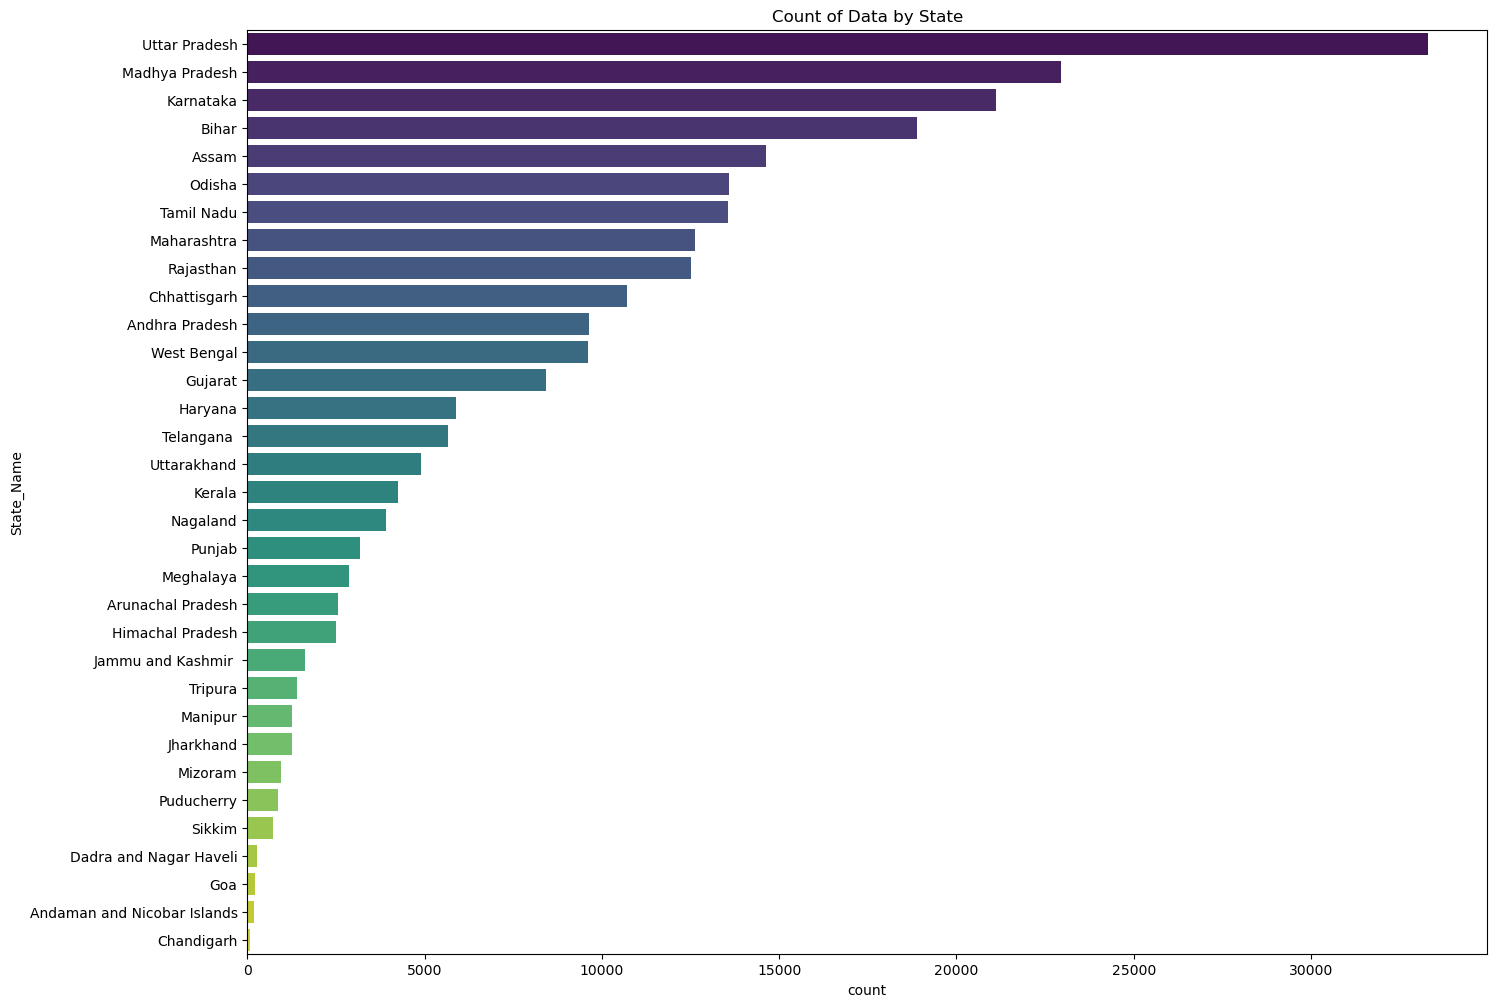

In [11]:
# Count plots for categorical variables
plt.figure(figsize=(16,12))
sns.countplot(y='State_Name', data=data, order=data['State_Name'].value_counts().index, palette='viridis')
plt.title('Count of Data by State')
plt.show()

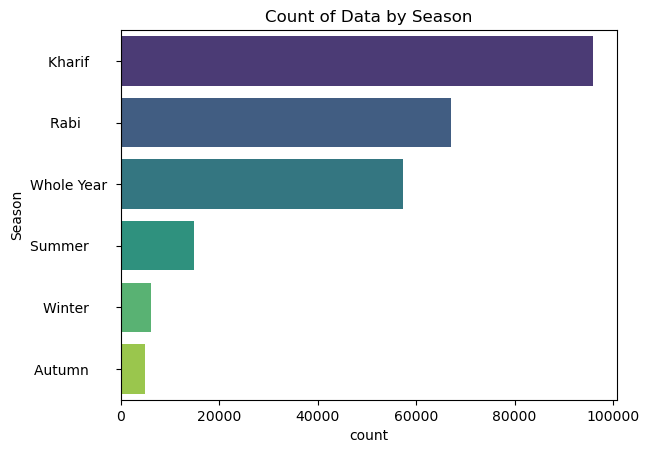

In [12]:
sns.countplot(y='Season', data=data, order=data['Season'].value_counts().index, palette='viridis')
plt.title('Count of Data by Season')
plt.show()

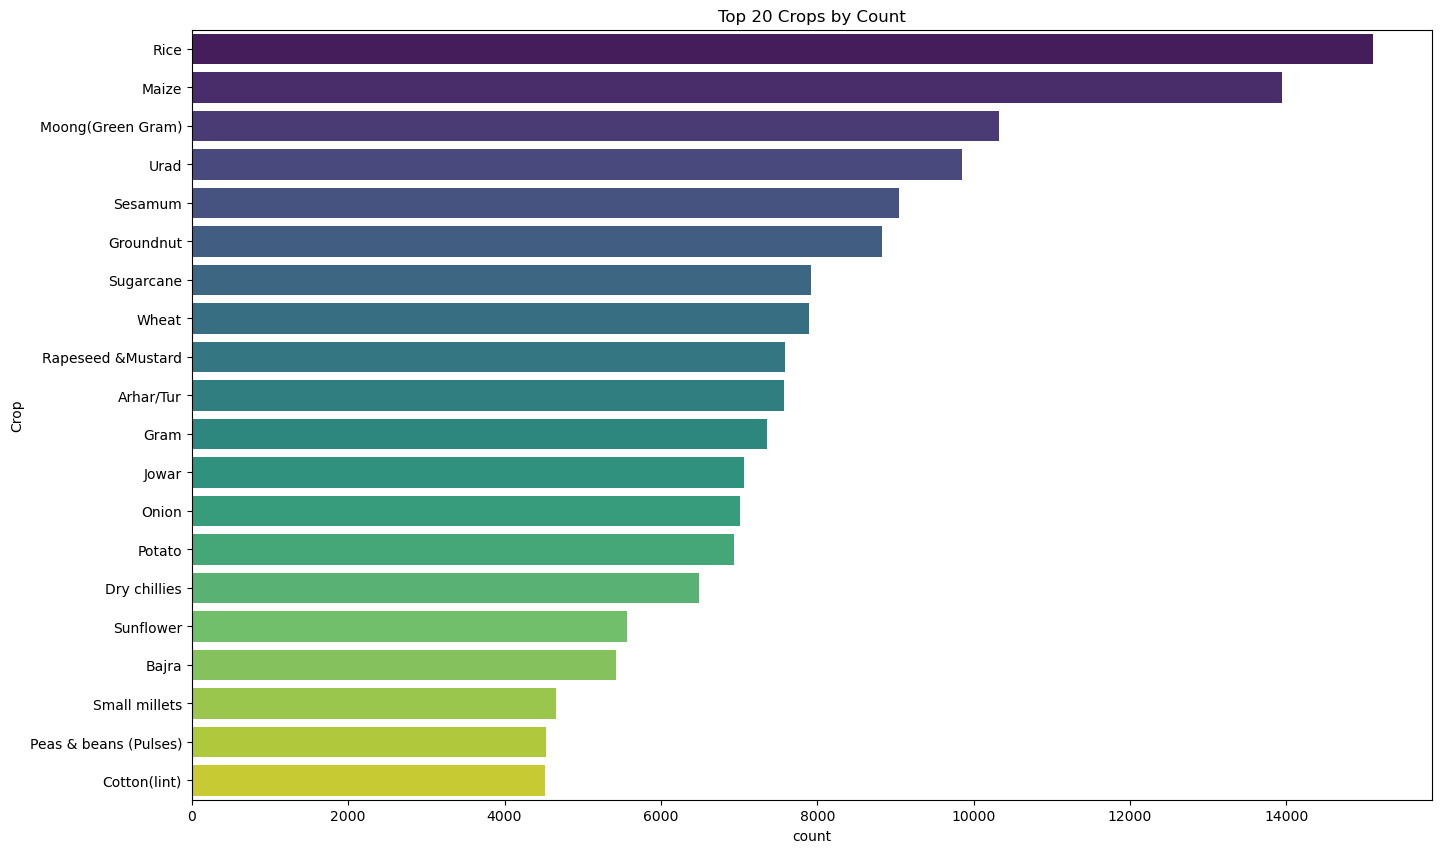

In [13]:
plt.figure(figsize=(16,10))
sns.countplot(y='Crop', data=data, order=data['Crop'].value_counts().iloc[:20].index, palette='viridis')
plt.title('Top 20 Crops by Count')
plt.show()

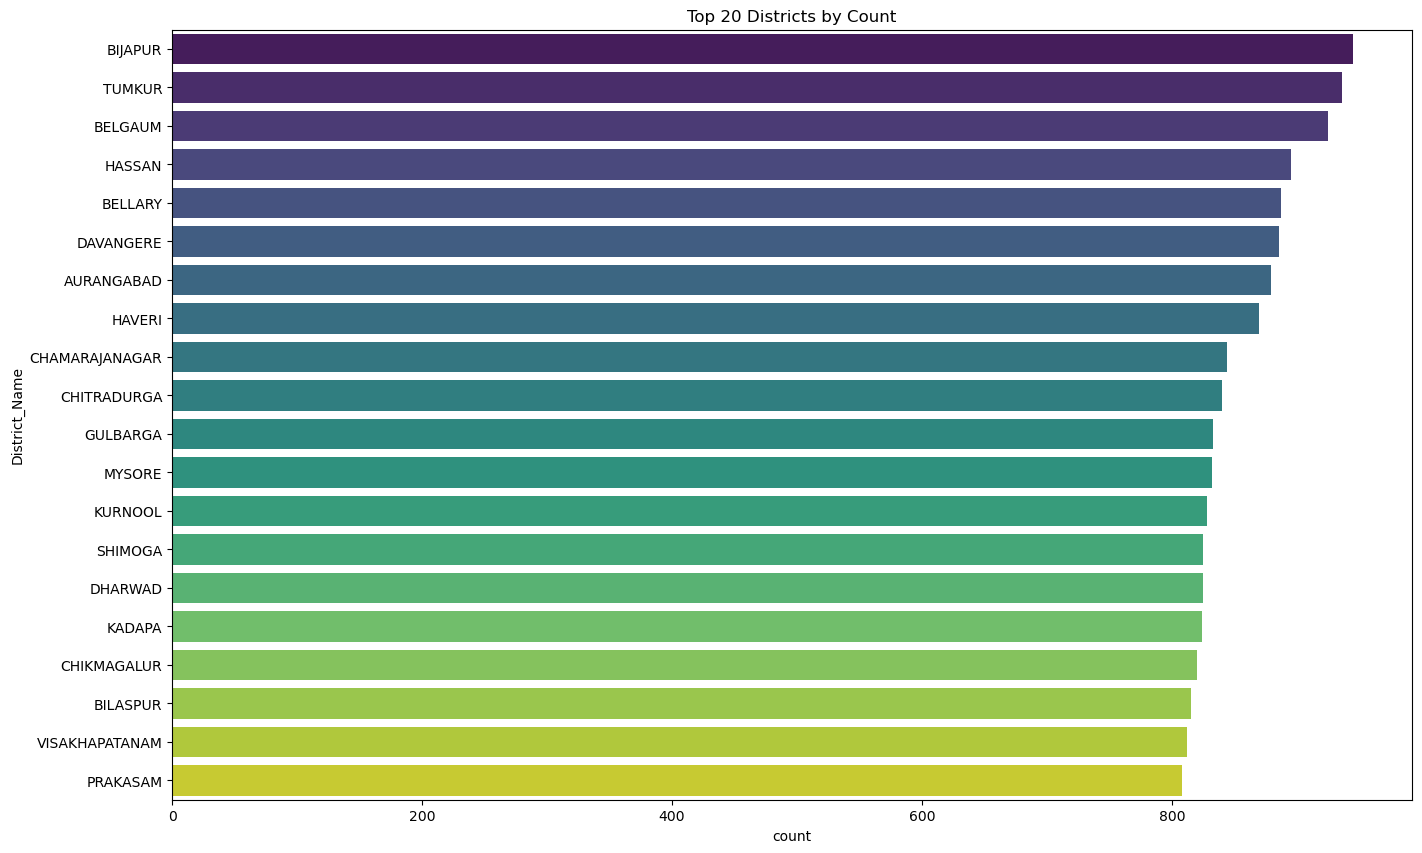

In [14]:
plt.figure(figsize=(16,10))
sns.countplot(y='District_Name', data=data, order=data['District_Name'].value_counts().iloc[:20].index, palette='viridis')
plt.title('Top 20 Districts by Count')
plt.show()

# Correlation Analysis

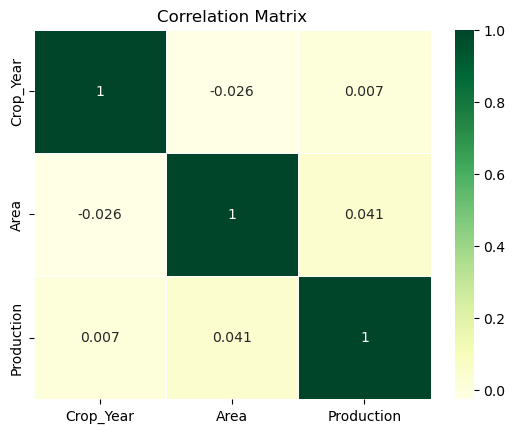

In [15]:
numerical_cols = ['Crop_Year', 'Area', 'Production']
corr_matrix = data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGn', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Trend Analysis

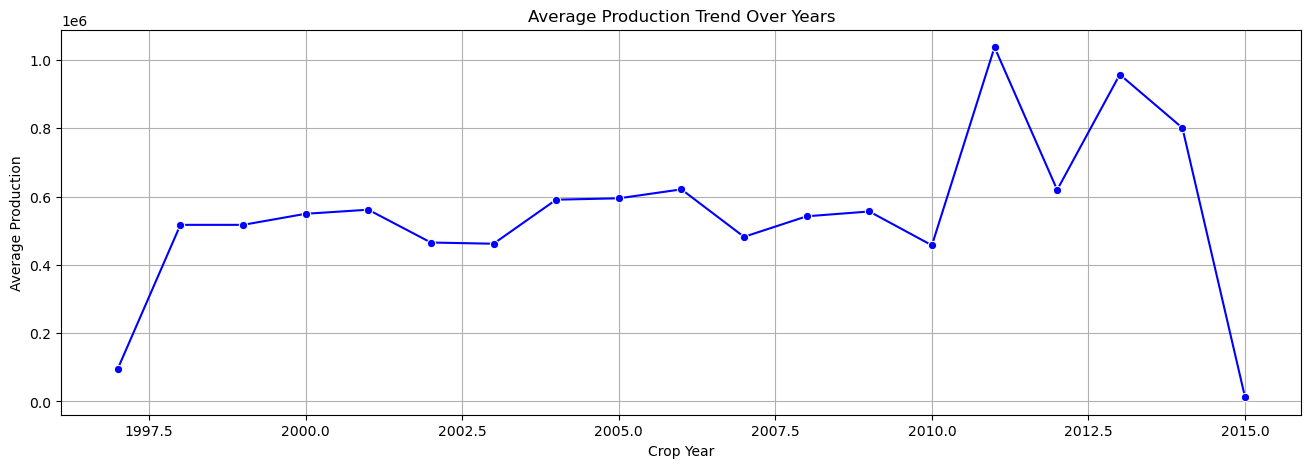

In [22]:
yearly_trends = data.groupby('Crop_Year')['Production'].mean().reset_index()
plt.figure(figsize=(16,5))
sns.lineplot(x='Crop_Year', y='Production', data=yearly_trends, marker='o', color='b')
plt.title('Average Production Trend Over Years')
plt.xlabel('Crop Year')
plt.ylabel('Average Production')
plt.grid(True)
plt.show()

# Seasonal Analysis

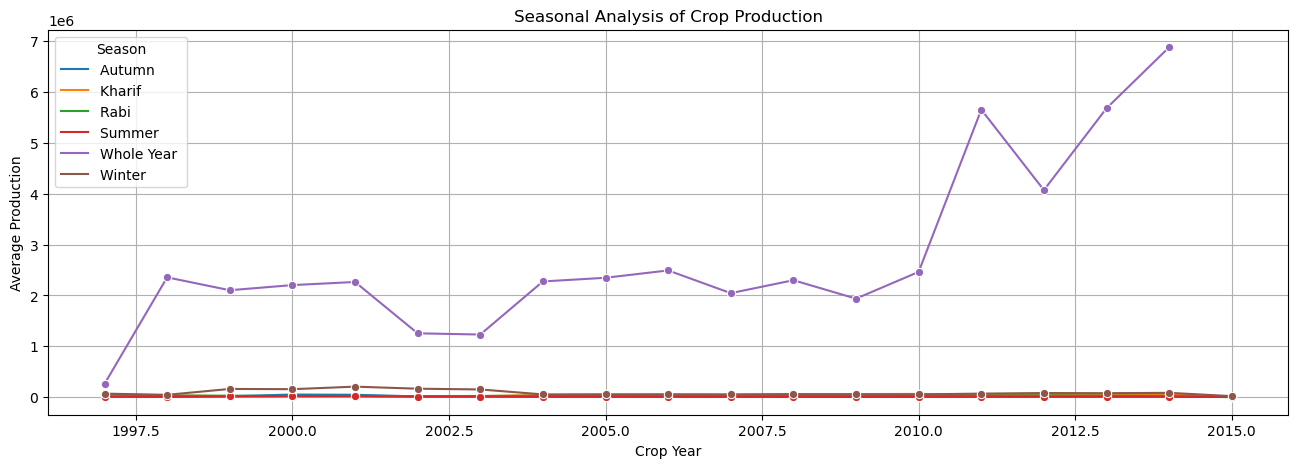

In [19]:
seasonal_data = data.groupby(['Season', 'Crop_Year'])['Production'].mean().reset_index()
plt.figure(figsize=(16,5))
sns.lineplot(x='Crop_Year', y='Production', hue='Season', data=seasonal_data, marker='o')
plt.title('Seasonal Analysis of Crop Production')
plt.xlabel('Crop Year')
plt.ylabel('Average Production')
plt.legend(title='Season')
plt.grid(True)
plt.show()

# Geograhpical Analysis

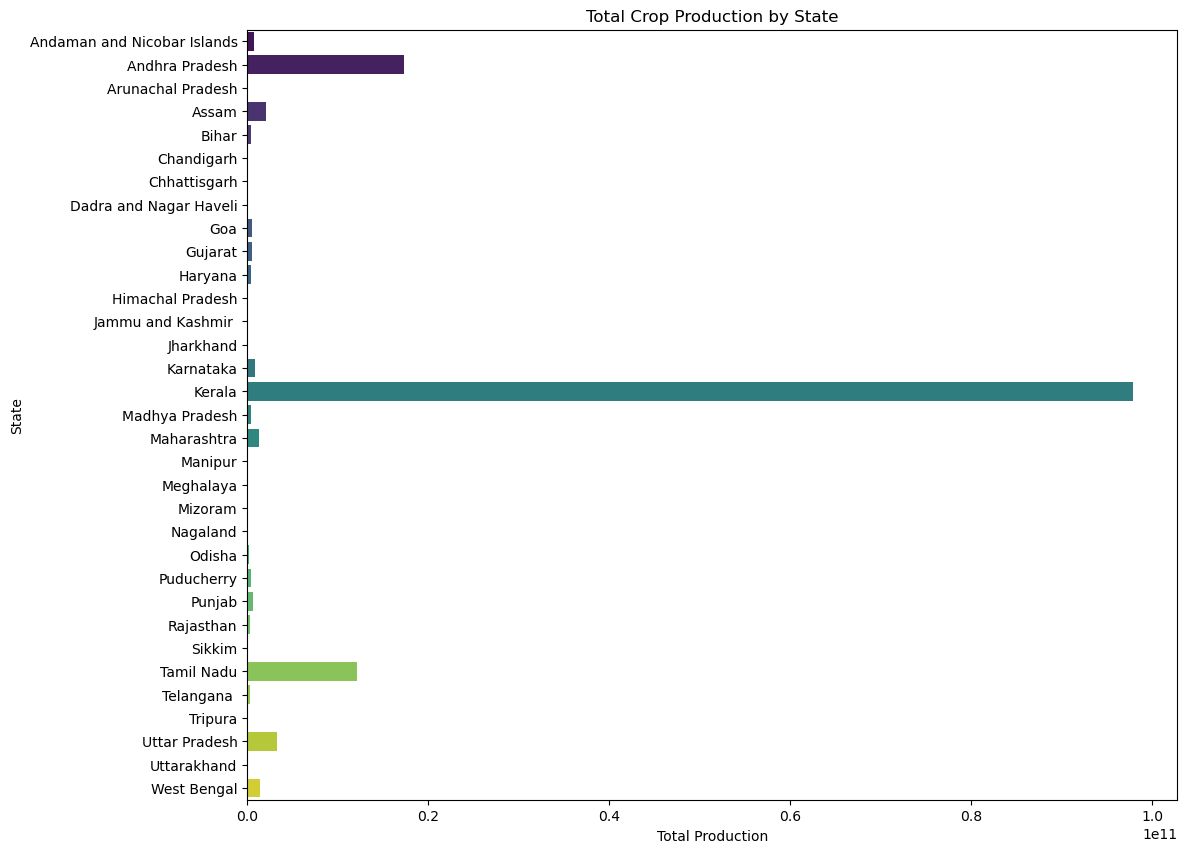

In [21]:
state_production = data.groupby('State_Name')['Production'].sum().reset_index()
plt.figure(figsize=(12,10))
sns.barplot(x='Production', y='State_Name', data=state_production, palette='viridis')
plt.title('Total Crop Production by State')
plt.xlabel('Total Production')
plt.ylabel('State')
plt.show()